In [2]:
import torch

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
device

'cuda'

In [5]:
from diffusers import DDPMPipeline

In [6]:
image_pipe = DDPMPipeline.from_pretrained("google/ddpm-celebahq-256")

diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch E:\.cache\HF\models--google--ddpm-celebahq-256\snapshots\cd5c944777ea2668051904ead6cc120739b86c4d: Error no file named diffusion_pytorch_model.safetensors found in directory E:\.cache\HF\models--google--ddpm-celebahq-256\snapshots\cd5c944777ea2668051904ead6cc120739b86c4d.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [7]:
image_pipe.to(device)

DDPMPipeline {
  "_class_name": "DDPMPipeline",
  "_diffusers_version": "0.30.2",
  "_name_or_path": "google/ddpm-celebahq-256",
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ]
}

In [8]:
image = torch.randn(8, 3, 256, 256).to(device)

In [9]:
image_pipe.scheduler.set_timesteps(num_inference_steps=30)

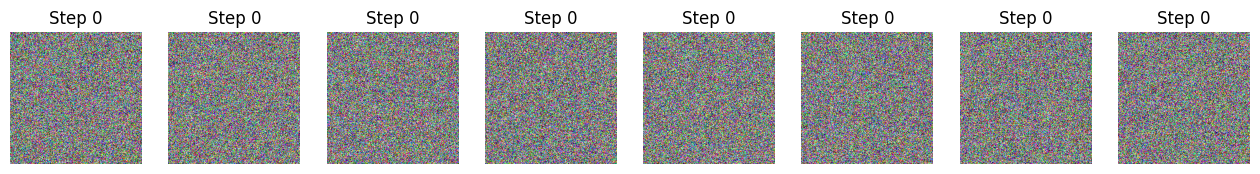

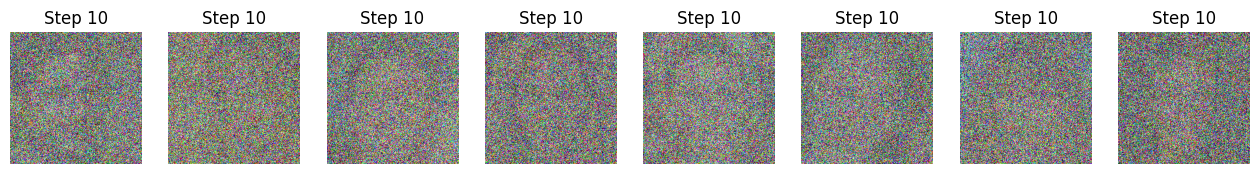

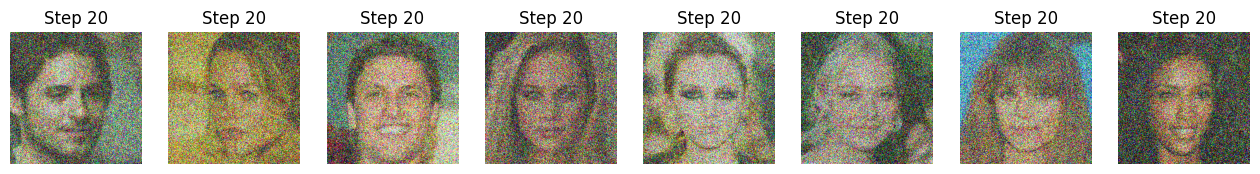

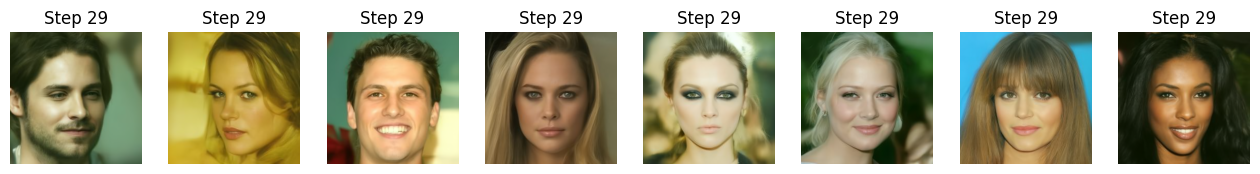

In [10]:
import matplotlib.pyplot as plt

for i, t in enumerate(image_pipe.scheduler.timesteps):
    with torch.inference_mode():
        noise_pred = image_pipe.unet(image, t)["sample"]

    scheduler_output = image_pipe.scheduler.step(noise_pred, t, image)
    image = scheduler_output.prev_sample

    # Hiển thị mỗi 10 bước hoặc bước cuối
    if i % 10 == 0 or i == len(image_pipe.scheduler.timesteps) - 1:
        batch_size = image.shape[0]

        # Tạo grid để chứa tất cả ảnh trong batch
        fig, axes = plt.subplots(1, batch_size, figsize=(batch_size * 2, 2))

        if batch_size == 1:
            axes = [axes]

        for j in range(batch_size):
            img = image[j]
            img = (img / 2 + 0.5).clamp(0, 1)  # scale [-1,1] -> [0,1]
            img = img.detach().cpu().permute(1, 2, 0).numpy()

            axes[j].imshow(img)
            axes[j].axis("off")
            axes[j].set_title(f"Step {i}")

        plt.show()